In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#Loading the dataset
e = pd.read_csv('earthquake.csv')

In [3]:
#Performing feature engineering based on 'Depth' column
depth_bins = [-np.inf, 50, 150, np.inf]
depth_labels = ['Shallow', 'Moderate', 'Deep']
e['Depth_Category'] = pd.cut(e['Depth'], bins = depth_bins, labels = depth_labels)
e = pd.get_dummies(e, columns = ['Depth_Category'], drop_first = True)

In [4]:
#Extracting the features and target variables
features = ['Latitude', 'Longitude', 'Magnitude', 'Depth_Category_Moderate', 'Depth_Category_Deep']
X = e[features]
Y = e['Magnitude']

In [5]:
#Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 40)

In [6]:
#Standardizing the features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [7]:
#Training the Neural Network Model
model = MLPRegressor(hidden_layer_sizes = (100, 50), activation = 'relu', solver = 'adam', max_iter = 1000, random_state = 40)
model.fit(X_train_scaled, Y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=40)

In [8]:
#Make predictions on the testing set
Y_pred = model.predict(X_test_scaled)

In [9]:
#Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

In [10]:
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  0.0034495861660656536
R^2 Score:  0.9947721052176888
Mean Absolute Error:  0.03574176355900055


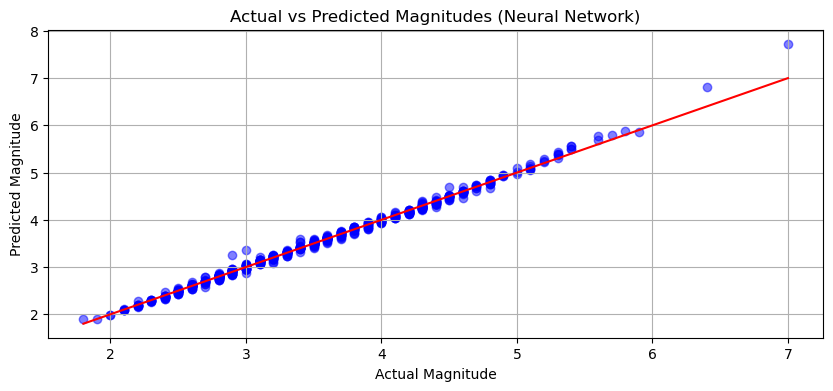

In [16]:
#Plotting the actual vs the predicted values
plt.figure(figsize = (10, 4))
plt.scatter(Y_test, Y_pred, color = 'blue', alpha = 0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color = 'red')
plt.title('Actual vs Predicted Magnitudes (Neural Network)')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.grid(True)
plt.show()